<a href="https://colab.research.google.com/github/strawndri/slaviero-suct-data-analysis/blob/main/Notebooks/refunds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Estornos - Maio 2022
---

## 1. Importações

### 1.1 Bibliotecas

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.2 Bases de Dados

In [34]:
dataset = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Data/estornos-maio.csv')
dataset.head()

,UH,Reserva,Descrição,Crédito,Débito,Valor,Data,Hora,Usuário,Qtde.,Motivo
0,107.0,57429723.0,DIARIA,-293.00,0.00,-293.00,05/01/2022,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,STONE - MASTERCARD D,0.00,32.25,32.25,05/01/2022,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,DIFERENÇA DE DIARIA,-196.79,0.00,-196.79,05/01/2022,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,DIARIA,-196.24,0.00,-196.24,05/01/2022,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,DIFERENÇA DE DIARIA,-30.00,0.00,-30.00,05/01/2022,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


## 2. Tratamento de Dados

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UH         584 non-null    float64
 1   Reserva    592 non-null    float64
 2   Descrição  624 non-null    object 
 3   Crédito    624 non-null    float64
 4   Débito     624 non-null    float64
 5   Valor      624 non-null    float64
 6   Data       624 non-null    object 
 7   Hora       624 non-null    object 
 8   Usuário    624 non-null    object 
 9   Qtde.      624 non-null    int64  
 10  Motivo     624 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 53.8+ KB


In [36]:
# alterando os valores das colunas
new_columns = {
    'UH': 'UH',	
    'Reserva': 'reserva',
    'Descrição': 'descricao',
    'Crédito': 'credito',
    'Débito': 'debito',
    'Valor': 'valor',
    'Data': 'data',
    'Hora': 'hora',
    'Usuário': 'usuario',
    'Qtde.': 'quantidade',
    'Motivo': 'motivo'
}

dataset.rename(columns = new_columns, inplace = True)

In [37]:
for i in range(0, len(dataset.data)):
  dataset.data[i] = dataset.data[i][3:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
dataset.head()

,UH,reserva,descricao,credito,debito,valor,data,hora,usuario,quantidade,motivo
0,107.0,57429723.0,DIARIA,-293.00,0.00,-293.00,01,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,STONE - MASTERCARD D,0.00,32.25,32.25,01,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,DIFERENÇA DE DIARIA,-196.79,0.00,-196.79,01,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,DIARIA,-196.24,0.00,-196.24,01,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,DIFERENÇA DE DIARIA,-30.00,0.00,-30.00,01,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


## 3. Funções utilizadas e variáveis

In [39]:
palette = ['#0e6580']

In [40]:
def plot_config():
  sns.set_style('darkgrid')
  plt.figure(figsize=(15, 5))

In [41]:
def set_barplot(x, y, data, xlabel, ylabel, title):

  plot_config()
  ax = sns.barplot(x=x, y=y, palette=palette, data=data)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

In [42]:
def set_lineplot(x, y, xlabel, ylabel, title):
  plot_config()
  ax = sns.lineplot(x=x, y=y)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

## 4. Análise de Dados

### 4.1 Quantidade de estornos por usuário

In [43]:
users_frequency = dataset.usuario.value_counts()
users = dataset.usuario.unique()

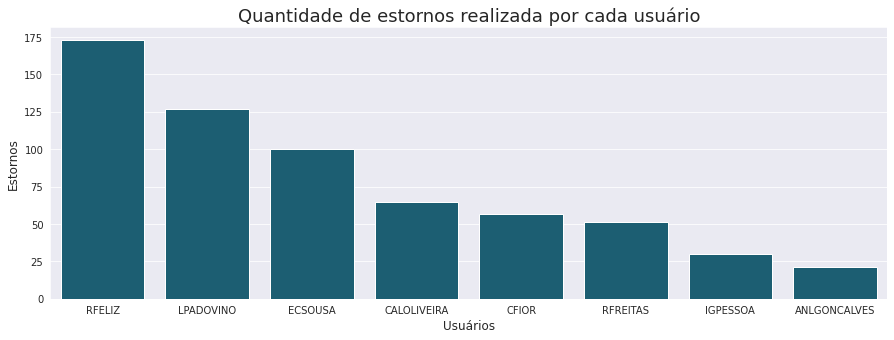

In [44]:
graphic = set_barplot(users, users_frequency, dataset, 
                      'Usuários', 'Estornos', 
                      'Quantidade de estornos realizada por cada usuário')
graphic

### 4.2 Quantidade de estornos diários

In [45]:
refunds_per_day = dataset.data.value_counts()
days = dataset.data.unique()

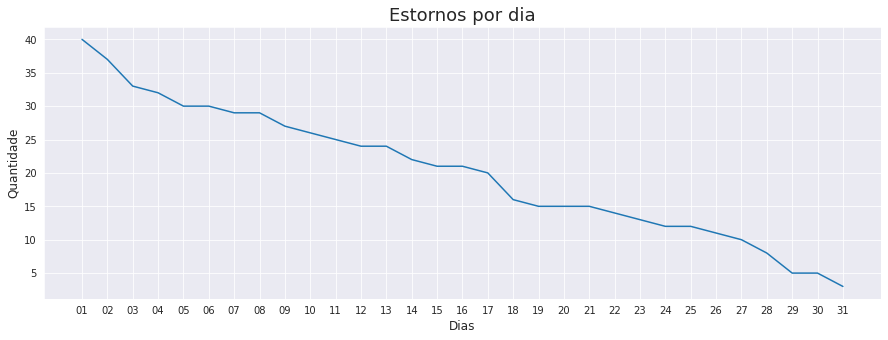

In [46]:
set_lineplot(days, refunds_per_day, "Dias", 'Quantidade', 'Estornos por dia')